### Import Libraries

In [1]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Load and Visualize Data
- Load `TSLA.csv`
- Display correlation matrix
- Plot heatmap and pairplot

**Results:**
The correlation matrix shows high collinearity among `Open`, `Low`, `High`, and `Adj Close`. This suggests that choosing one from these four features may be sufficient. Further analysis is needed to determine the best feature.


<ipython-input-2-a01133468c23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-2-a01133468c23>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="PiYG")


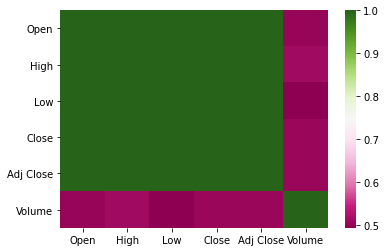

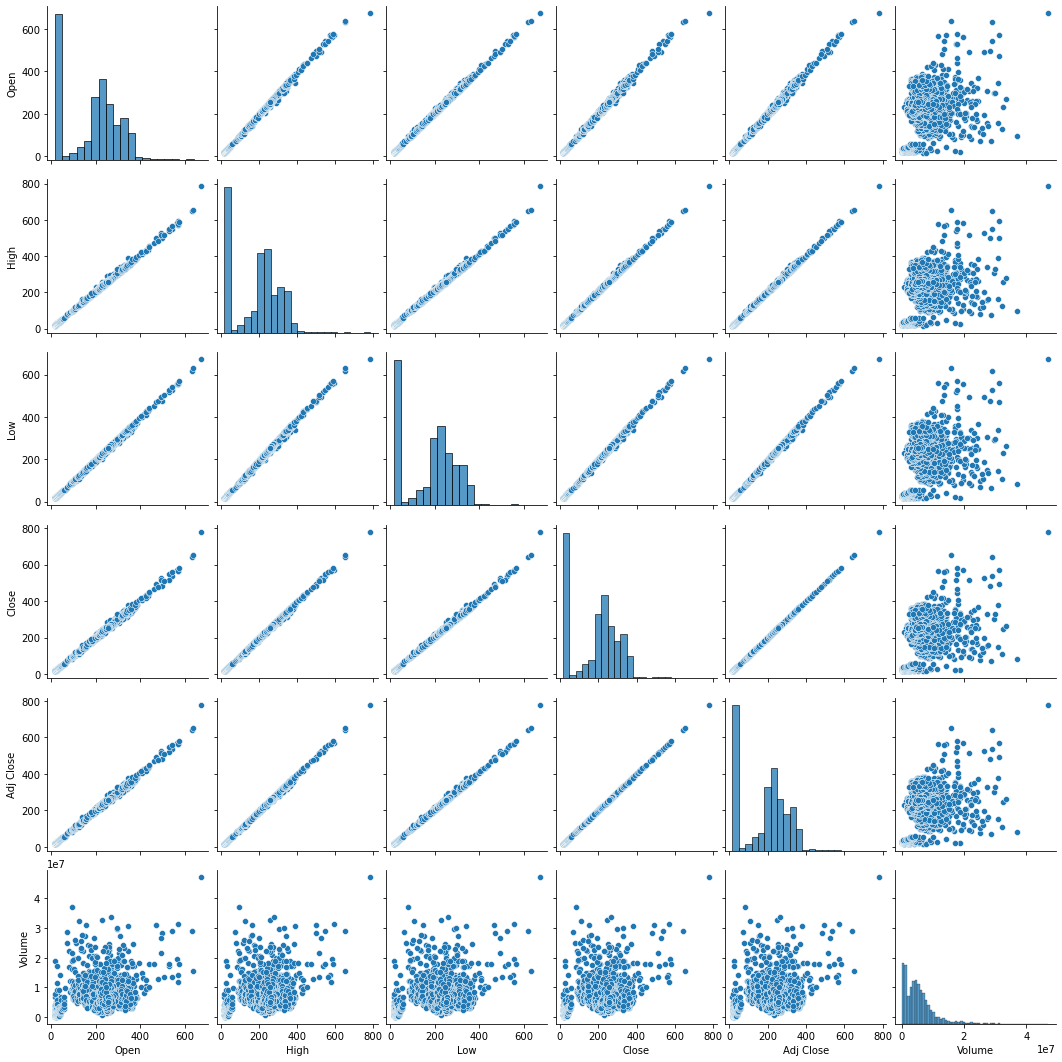

In [2]:
df=pd.read_csv('TSLA.csv')
df.corr()
sns.heatmap(df.corr(),cmap="PiYG")
sns.pairplot(df)

### Evaluate Linear Regression
- Splits data, trains model, evaluates performance.
- Metrics: MAE, MSE, RMSE, R².
- Returns: Results, `y_test`, `y_test_pred`.

### Plot Regression Results
- Plot Actual vs. Predicted Values.
- Plot Residuals vs. Predicted Values.
- Plot Histogram of Residuals.
- Displays error metrics on plots.


In [3]:


def evaluate_linear_regression(X, y, test_size=0.2, random_state=42):
    """
    Splits the data, trains a Linear Regression model, and evaluates its performance.
    
    Parameters:
    - X: Features (DataFrame or ndarray)
    - y: Target variable (Series or ndarray)
    - test_size: Proportion of the data to be used for testing (default is 0.2)
    - random_state: Seed for reproducibility (default is 42)
    
    Returns:
    - results: Dictionary containing MSE and R² scores for both training and test sets
    - y_test: Actual target values for the test set
    - y_test_pred: Predicted values for the test set
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate MSE and R² for the training set
    #mse_train = mean_squared_error(y_train, y_train_pred)
    #r2_train = r2_score(y_train, y_train_pred)
    
    # Calculate MSE and R² for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = metrics.mean_absolute_error(y_test,y_test_pred )
    # Retrieve coefficients and intercept
    coefficients = model.coef_
    intercept = model.intercept_
    
    
    # Return results and predictions
    results = {
        'mae_test': mae_test,
        'mse_test': mse_test,
        'rmse_test':rmse_test,
        'r2_test': r2_test
    }
    
    return results, y_test, y_test_pred

def plot_regression_results(y_test, y_test_pred):
    """
    Plots Actual vs. Predicted Values and Residuals for a regression model, including error metrics.
    
    Parameters:
    - y_test: Actual target values (Series or ndarray)
    - y_test_pred: Predicted values (Series or ndarray)
    """
    # Calculate error metrics
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
    # Compute residuals
    residuals = y_test - y_test_pred
    variance_residuals = residuals.var()

    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Plot 1: Actual vs Predicted Values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, color='royalblue', alpha=0.7, edgecolors='black', s=100, label='Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkred', linewidth=3, linestyle='--', label='Ideal Fit Line')
    plt.xlabel('Actual Values', fontsize=16, fontweight='bold', color='black')
    plt.ylabel('Predicted Values', fontsize=16, fontweight='bold', color='black')
    plt.title('Actual vs Predicted Values (Test Set)', fontsize=20, fontweight='bold', color='black')
    plt.legend(frameon=False, fontsize=14)
    
    # Add error metrics as text annotations
    textstr = '\n'.join((
        f'MAE: {mae_test:.4g}',
        f'MSE: {mse_test:.4g}',
        f'RMSE: {rmse_test:.4g}',
        f'R²: {r2_test:.4g}',
        f'Var Res: {variance_residuals:.4g}',
        
    ))
    
    # Place the text box on the plot
    plt.gcf().text(0.15, 0.60, textstr, fontsize=14, fontweight='bold', color='black',
    bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))
    
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_facecolor('#f0f0f0')  # Light grey background for the plot area
    plt.tight_layout()
    plt.show()
    plt.close()
    # Plot 2: Residual Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_pred, residuals, color='seagreen', alpha=0.7, edgecolors='black', s=100)
    plt.axhline(y=0, color='firebrick', linestyle='--', linewidth=3)
    plt.xlabel('Predicted Values', fontsize=16, fontweight='bold', color='black')
    plt.ylabel('Residuals', fontsize=16, fontweight='bold', color='black')
    plt.title('Residual Plot (Test Set)', fontsize=20, fontweight='bold', color='black')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_facecolor('#f0f0f0')  # Light grey background for the plot area
    plt.tight_layout()
    plt.show()
    plt.close()
    
    # Plot 3: Histogram of Residuals
    plt.figure(figsize=(8, 6))

    # Create the histogram
    sns.histplot(residuals, bins=30, kde=True, color='seagreen', edgecolor='black', linewidth=1.5)

    # Set the labels and title
    plt.xlabel('Residuals', fontsize=16, fontweight='bold', color='black')
    plt.ylabel('Frequency', fontsize=16, fontweight='bold', color='black')
    plt.title('Residuals Histogram', fontsize=20, fontweight='bold', color='black')

    # Style the plot area
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_facecolor('#f0f0f0')  # Light grey background for the plot area
    plt.tight_layout()

    # Show the plot
    plt.show()
    plt.close()





### Evaluate Feature Combinations Manually
- Define features: `Open`, `Low`, `High`, `Adj Close`, `Volume`.
- Loop through feature combinations (2 to 5 features).
- Scale data and evaluate using `evaluate_linear_regression`.
- Plot results with `plot_regression_results`.
- Store metrics in `results_dict`.

**Results:**
Adding more than 2 features does not significantly improve the model. Residual plots for all feature combinations indicate that the model fits the data poorly.


Evaluating combination: ['Open', 'Low']


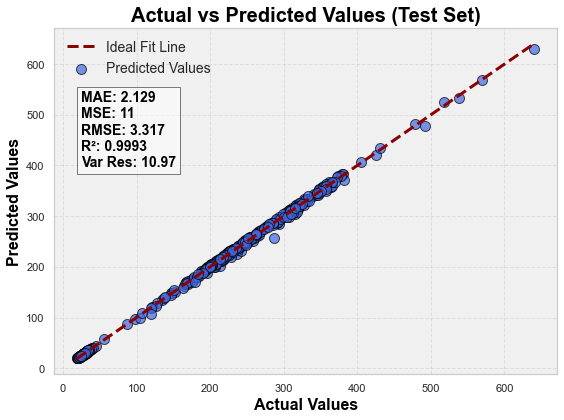

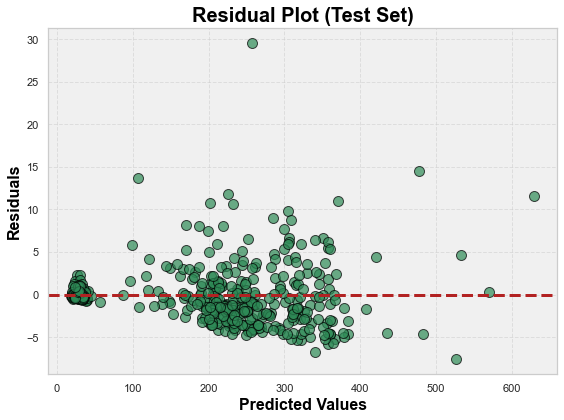

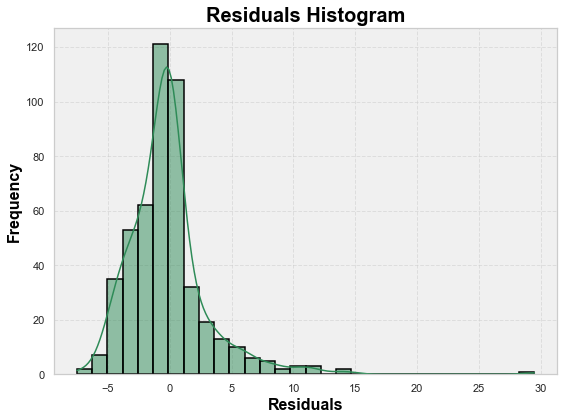

Evaluating combination: ['Open', 'High']


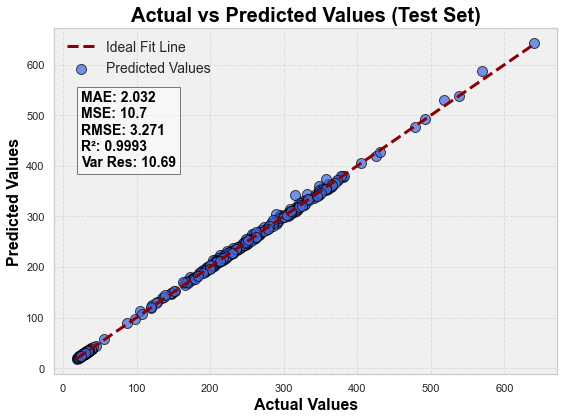

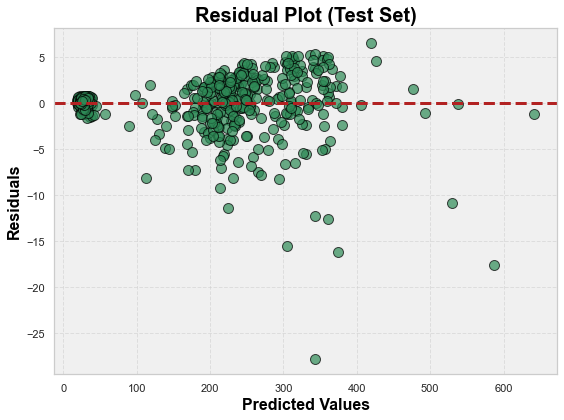

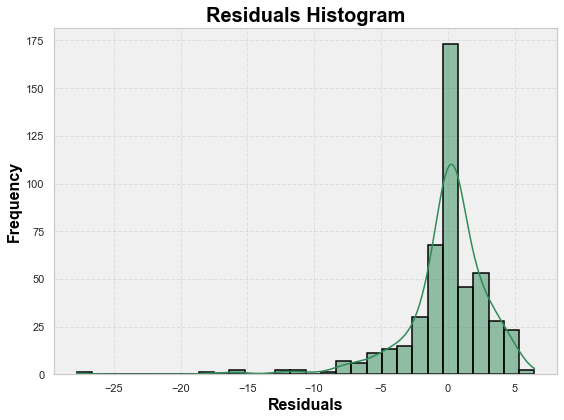

Evaluating combination: ['Open', 'Adj Close']


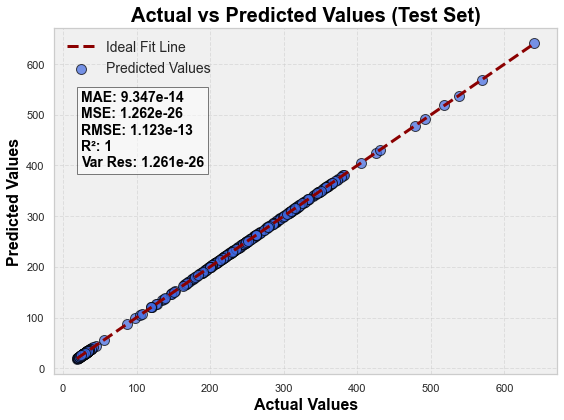

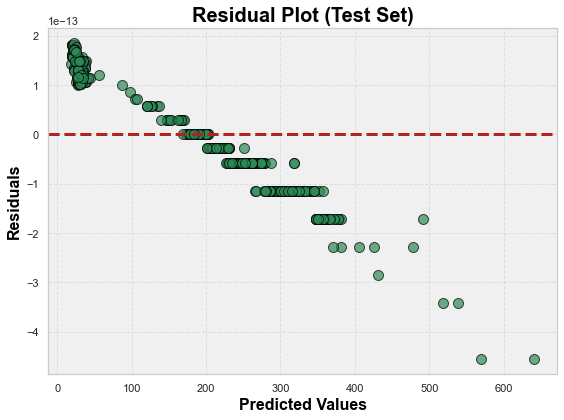

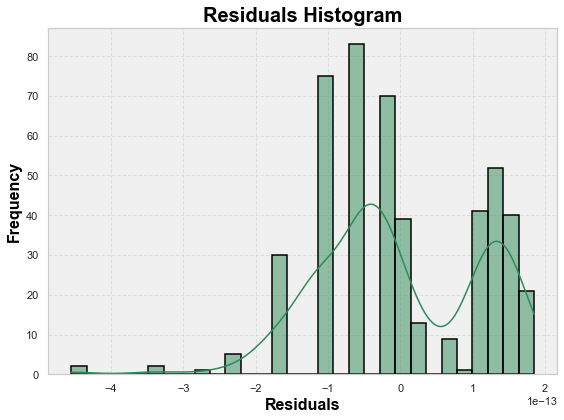

Evaluating combination: ['Open', 'Volume']


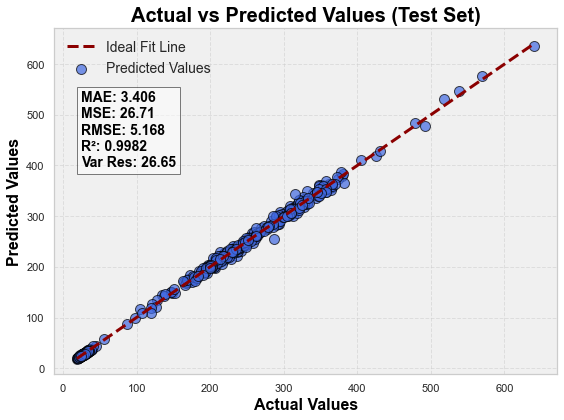

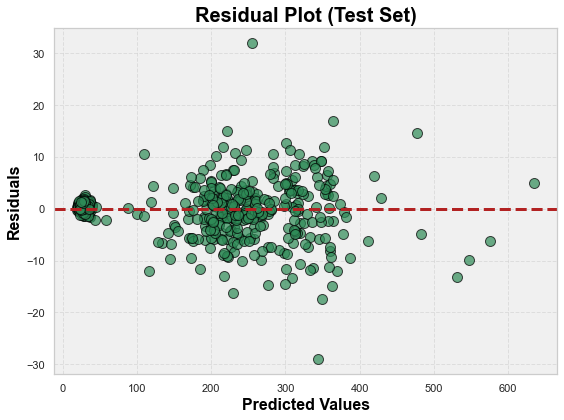

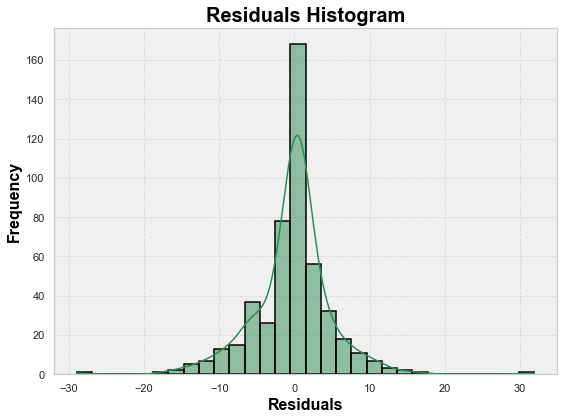

Evaluating combination: ['Low', 'High']


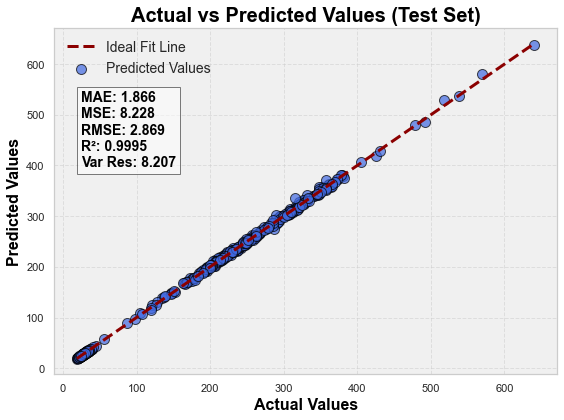

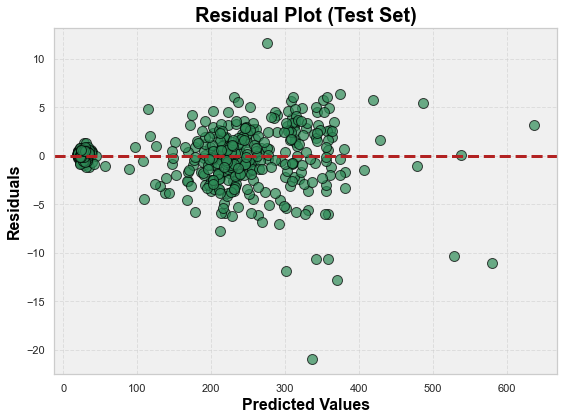

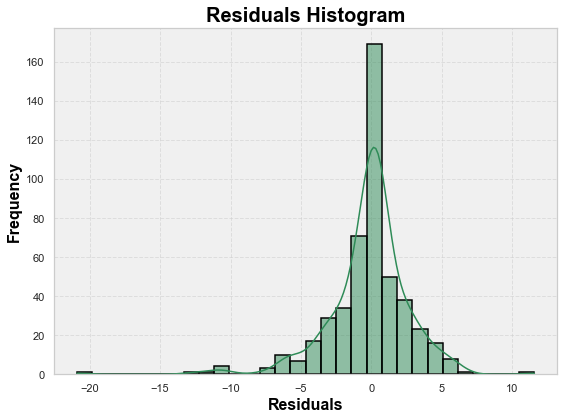

Evaluating combination: ['Low', 'Adj Close']


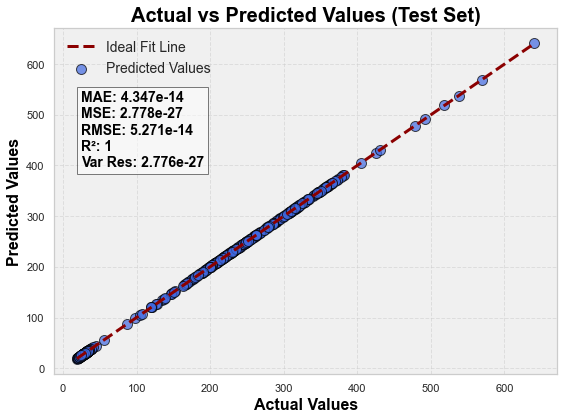

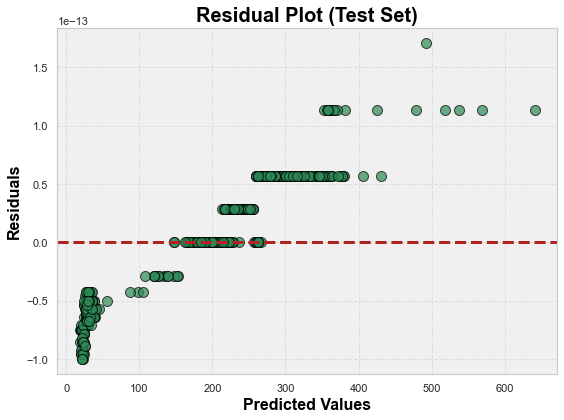

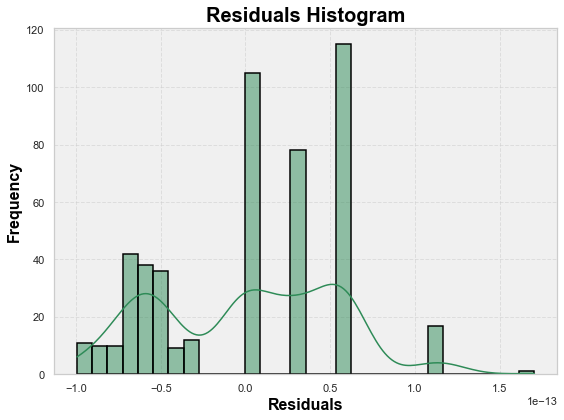

Evaluating combination: ['Low', 'Volume']


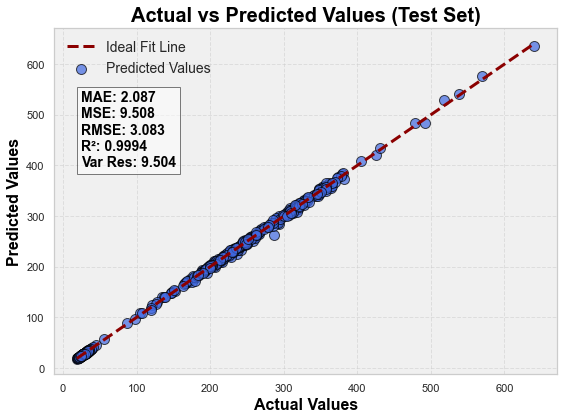

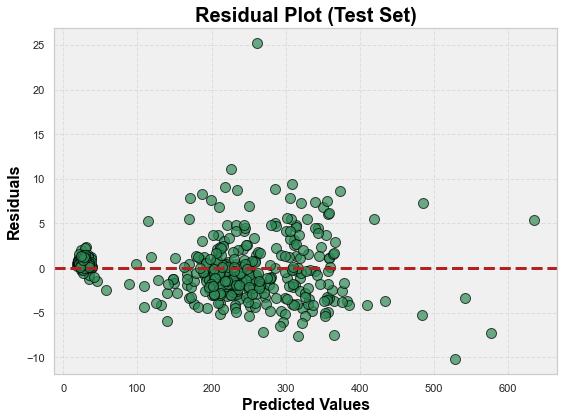

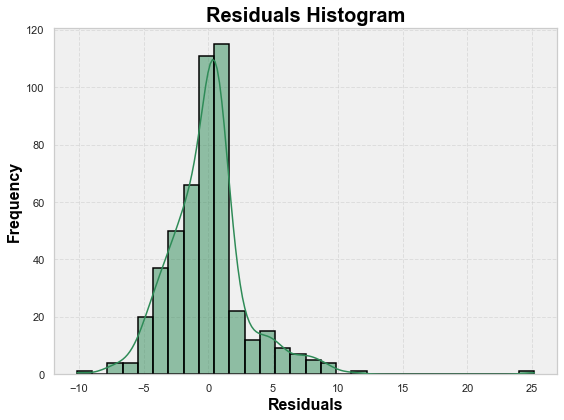

Evaluating combination: ['High', 'Adj Close']


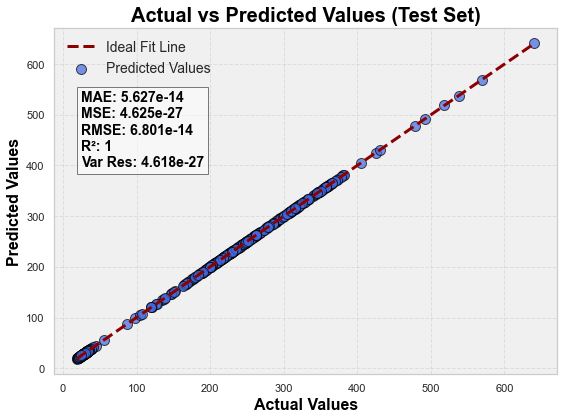

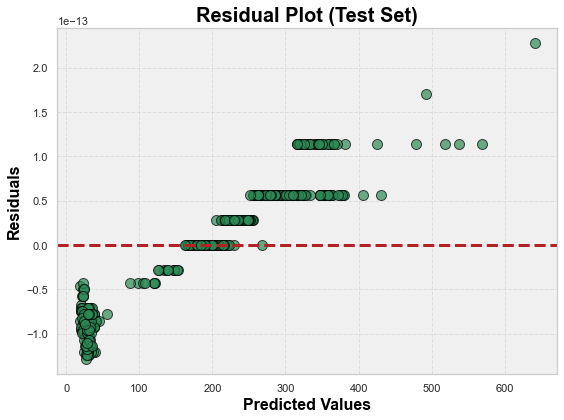

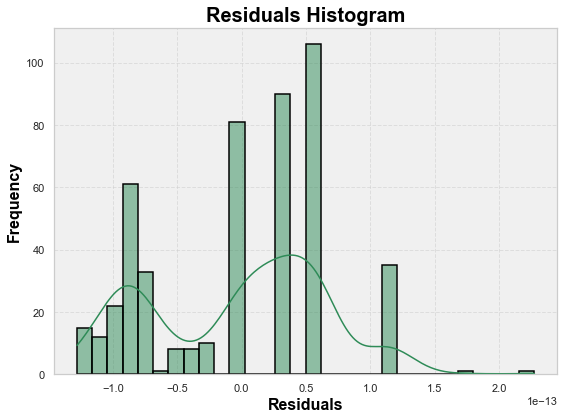

Evaluating combination: ['High', 'Volume']


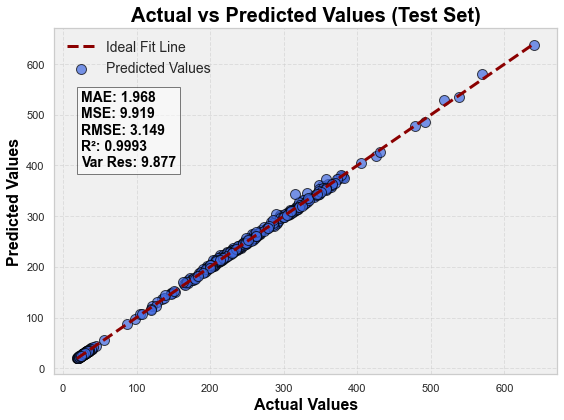

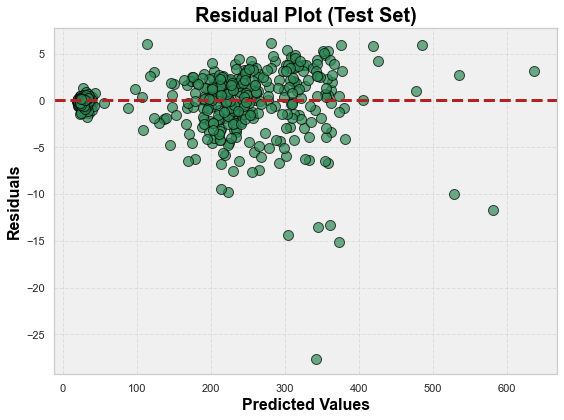

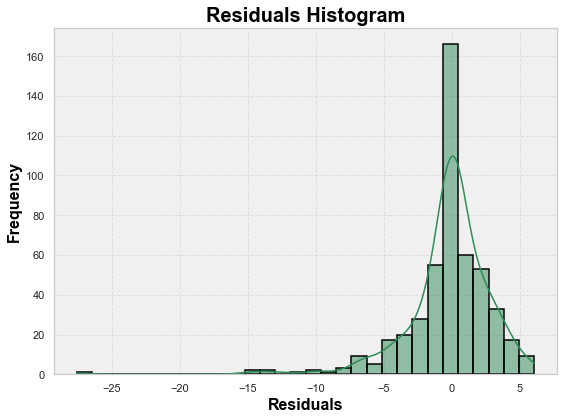

Evaluating combination: ['Adj Close', 'Volume']


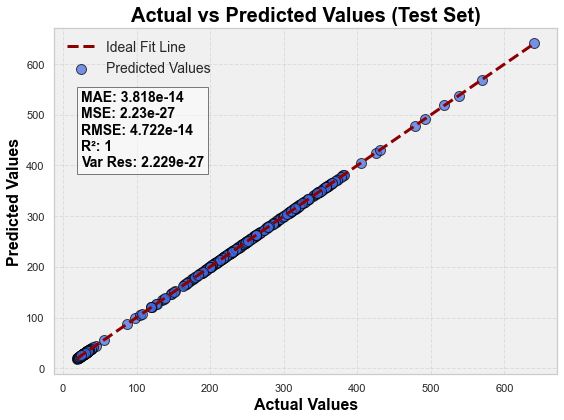

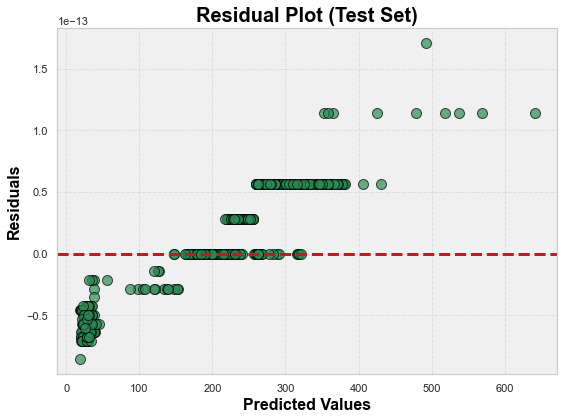

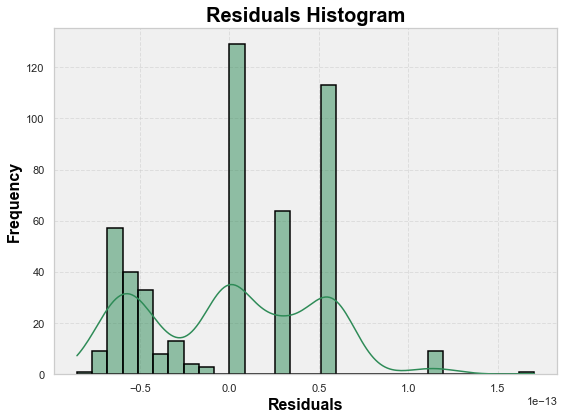

Evaluating combination: ['Open', 'Low', 'High']


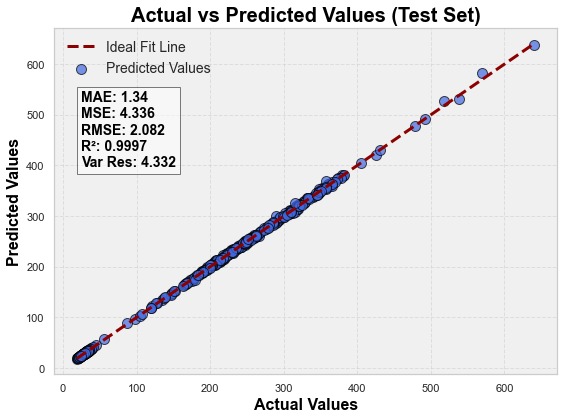

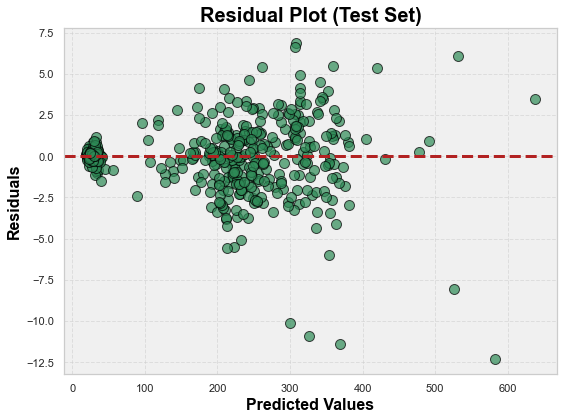

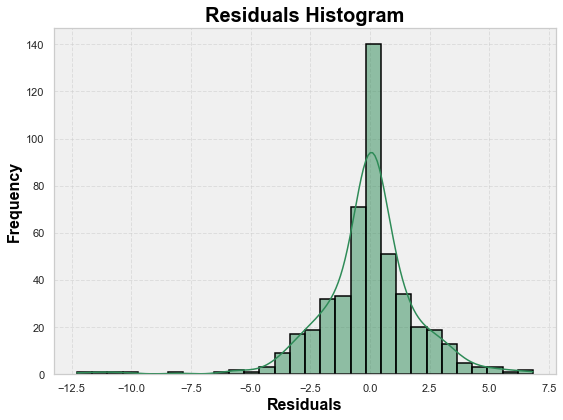

Evaluating combination: ['Open', 'Low', 'Adj Close']


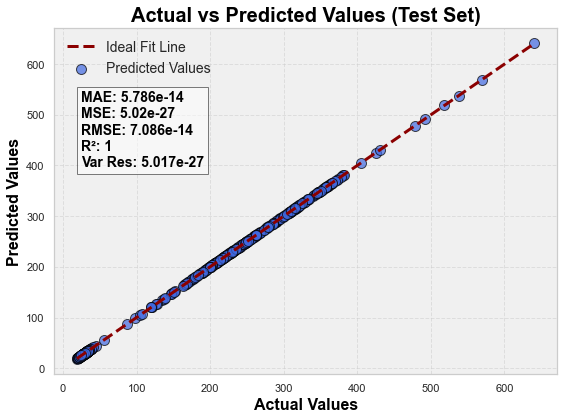

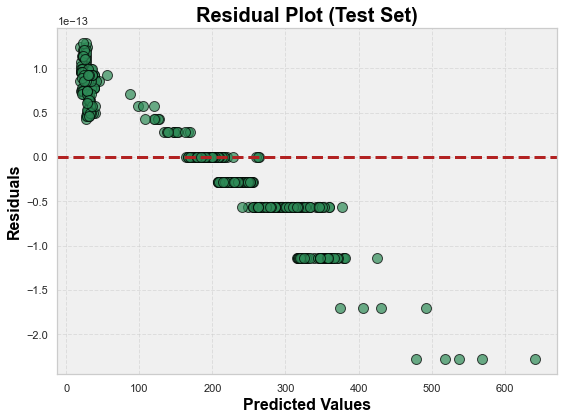

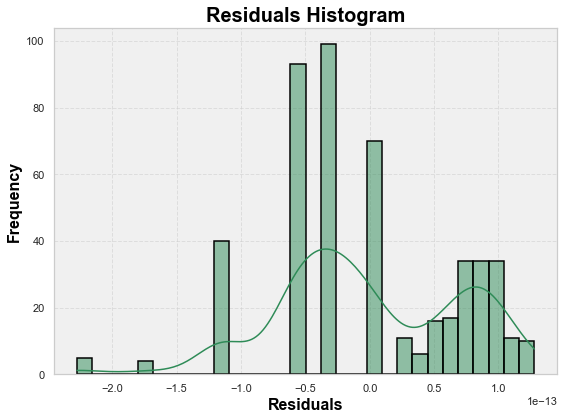

Evaluating combination: ['Open', 'Low', 'Volume']


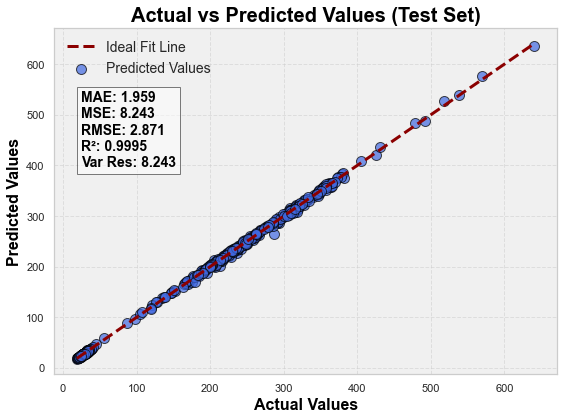

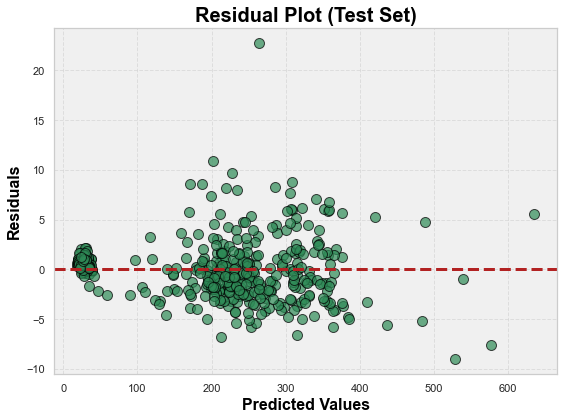

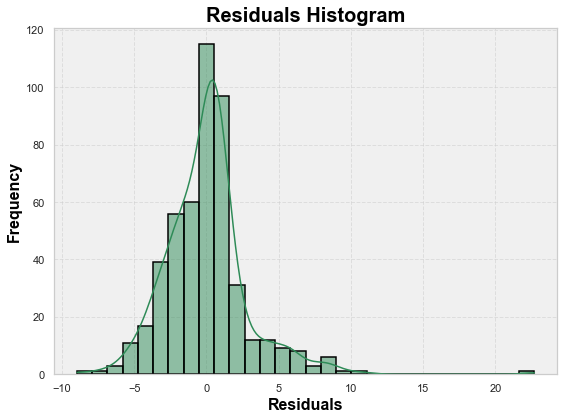

Evaluating combination: ['Open', 'High', 'Adj Close']


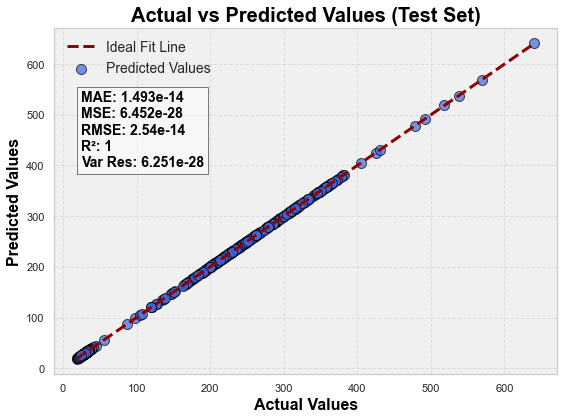

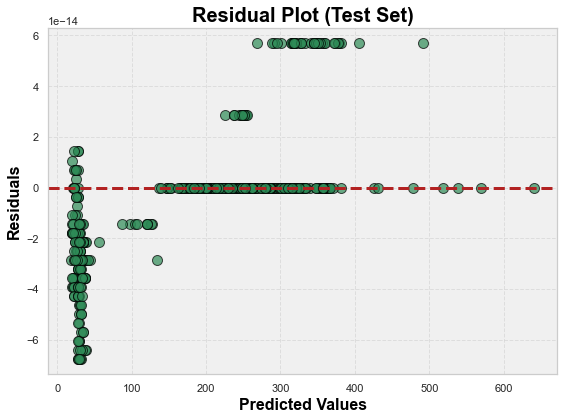

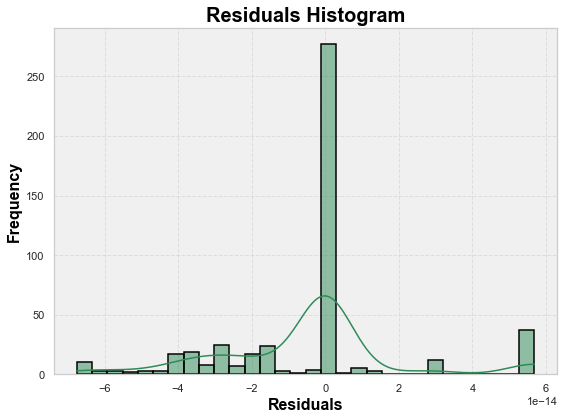

Evaluating combination: ['Open', 'High', 'Volume']


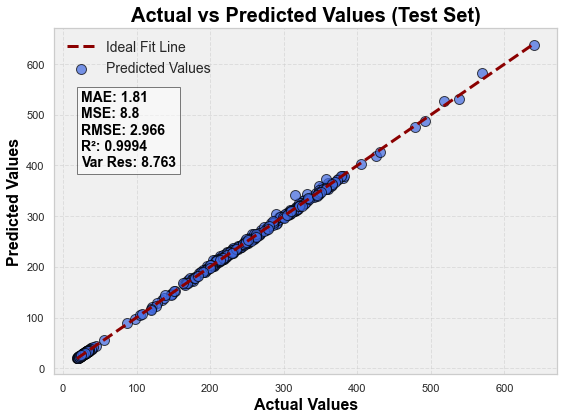

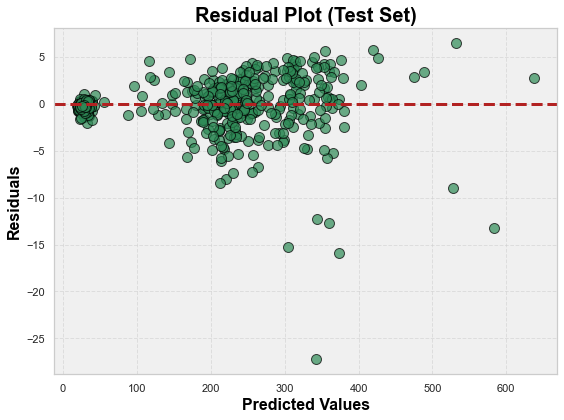

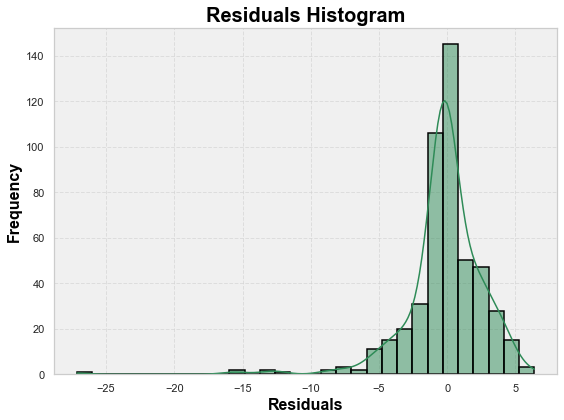

Evaluating combination: ['Open', 'Adj Close', 'Volume']


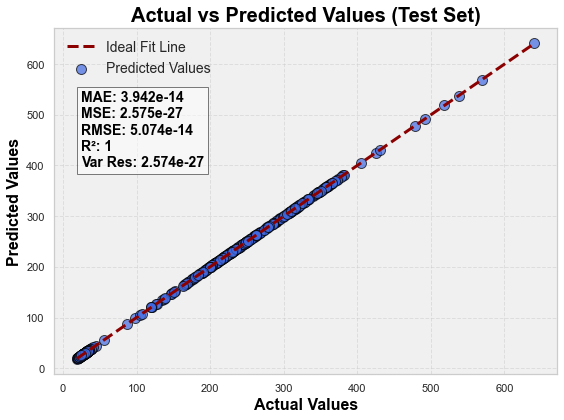

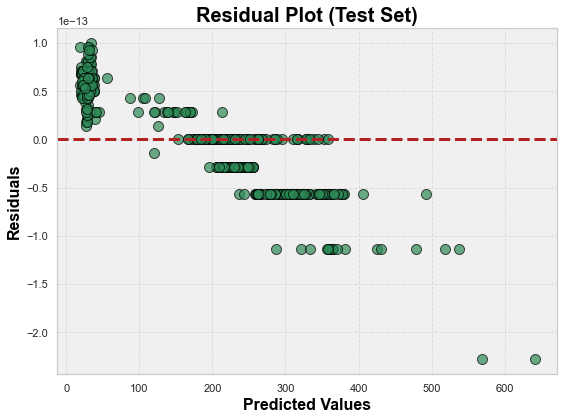

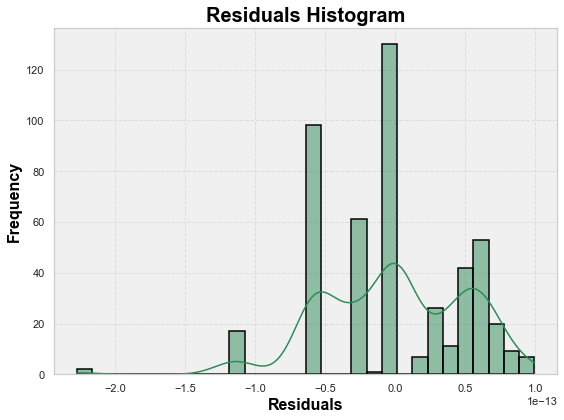

Evaluating combination: ['Low', 'High', 'Adj Close']


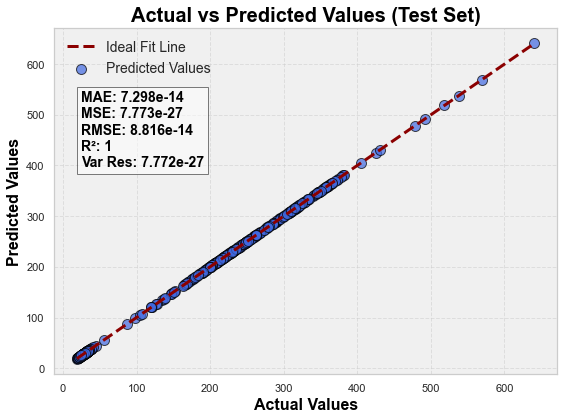

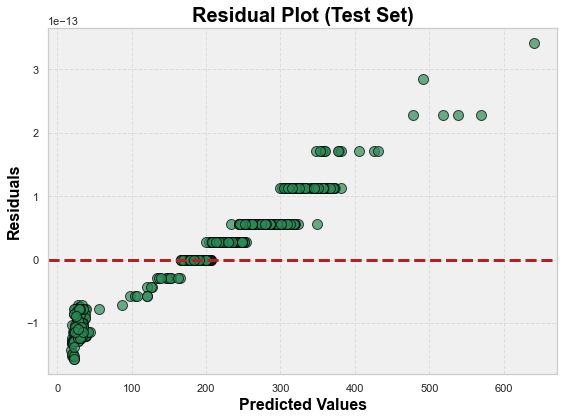

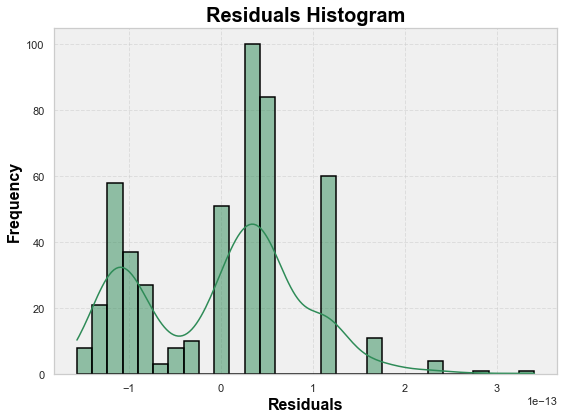

Evaluating combination: ['Low', 'High', 'Volume']


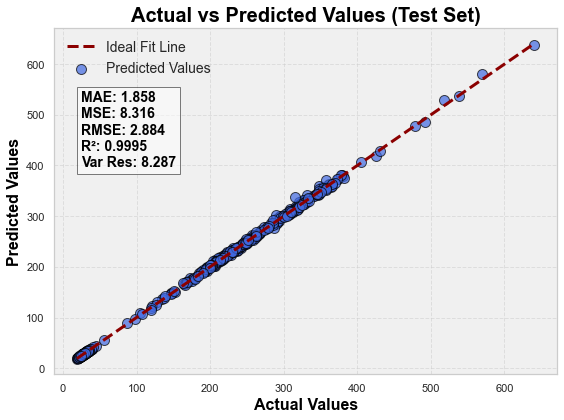

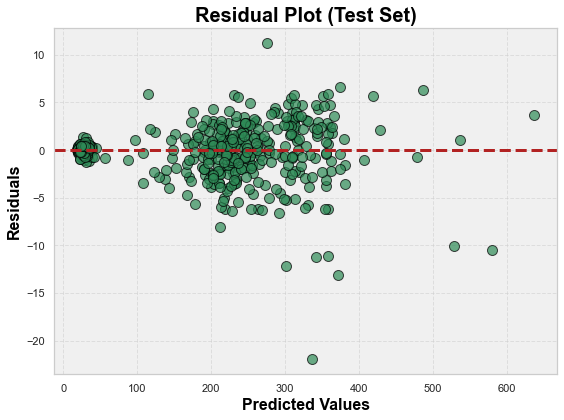

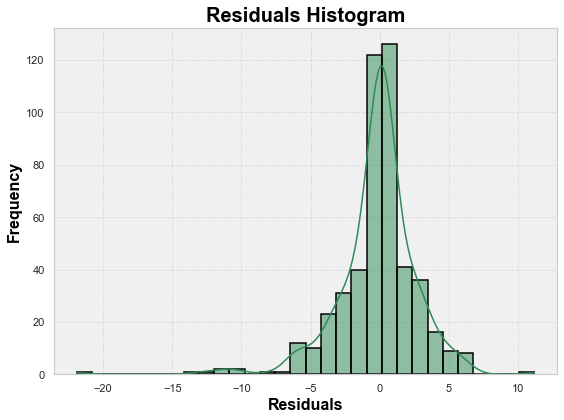

Evaluating combination: ['Low', 'Adj Close', 'Volume']


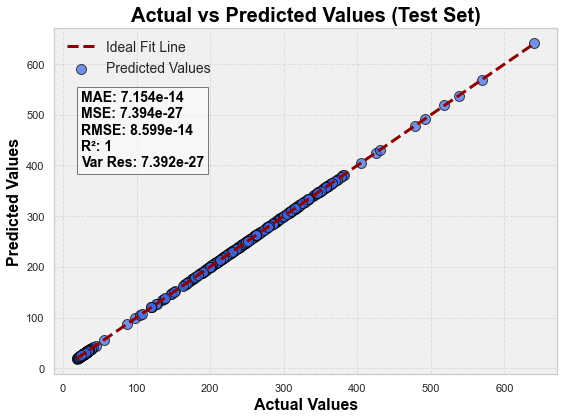

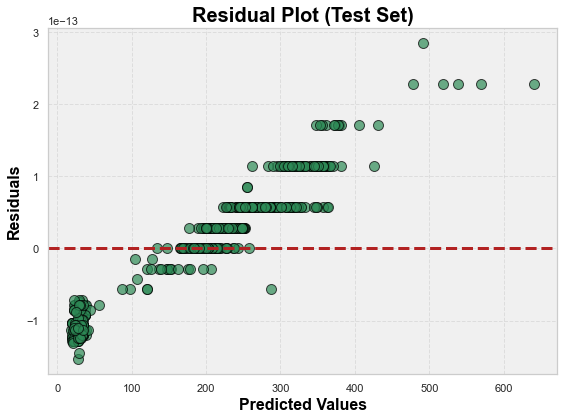

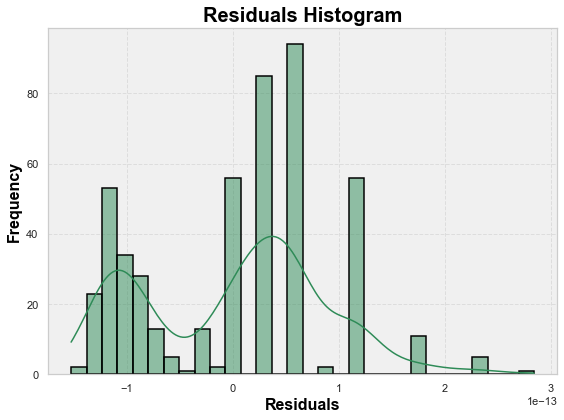

Evaluating combination: ['High', 'Adj Close', 'Volume']


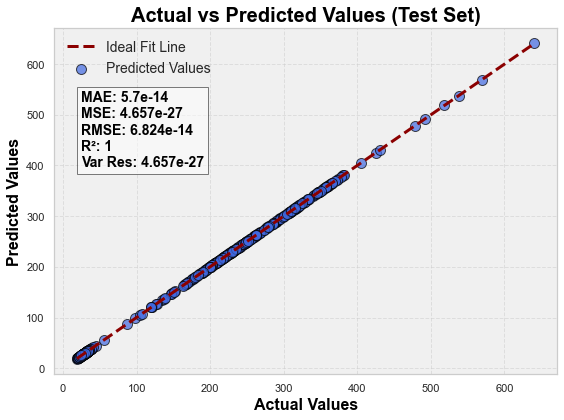

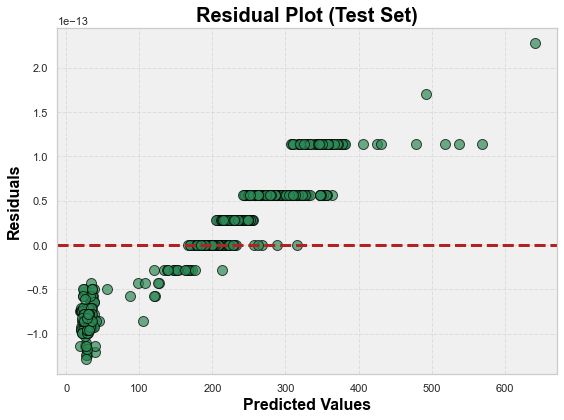

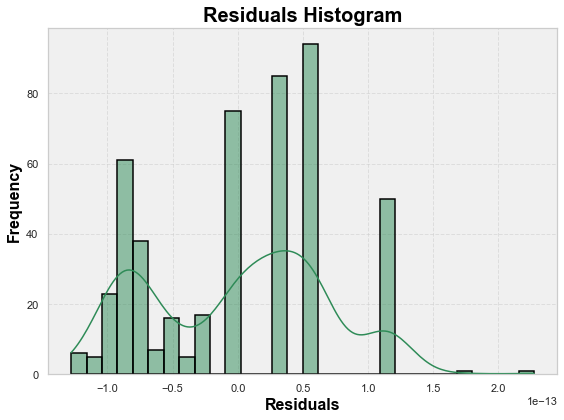

Evaluating combination: ['Open', 'Low', 'High', 'Adj Close']


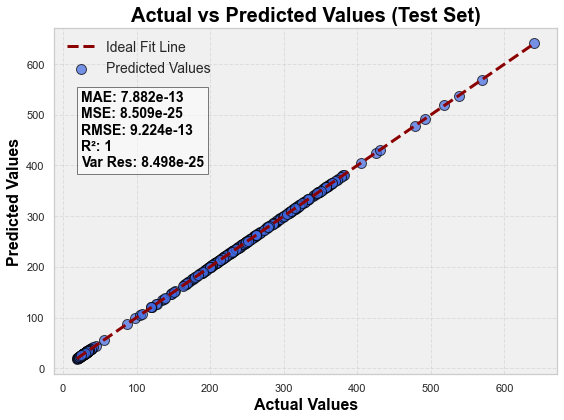

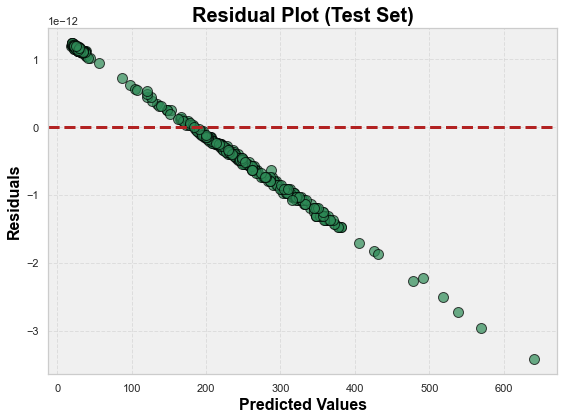

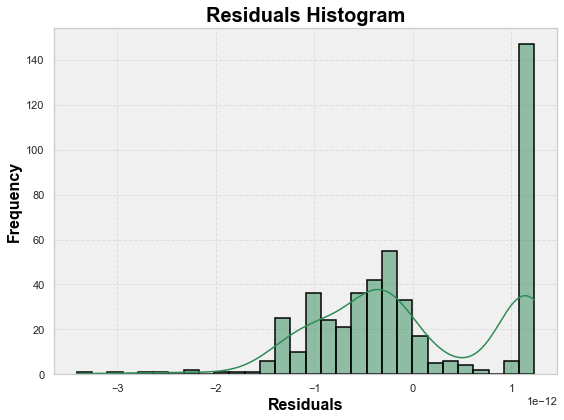

Evaluating combination: ['Open', 'Low', 'High', 'Volume']


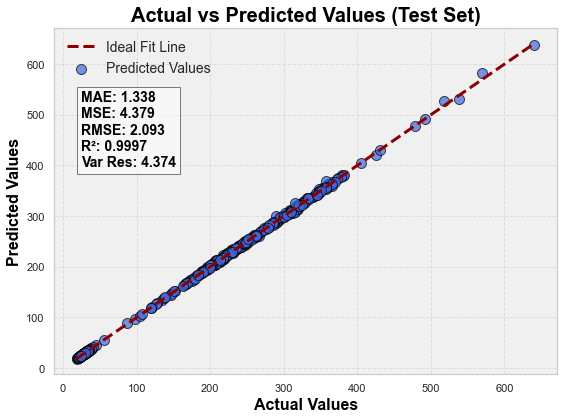

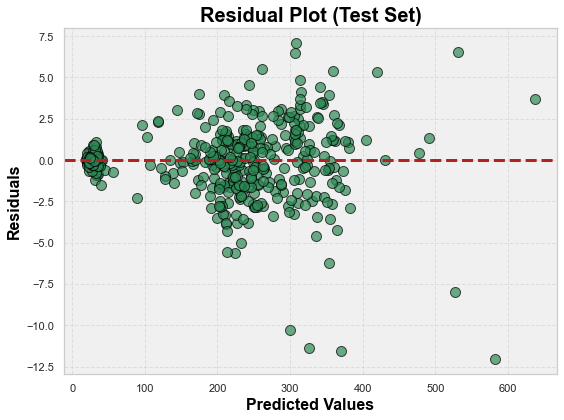

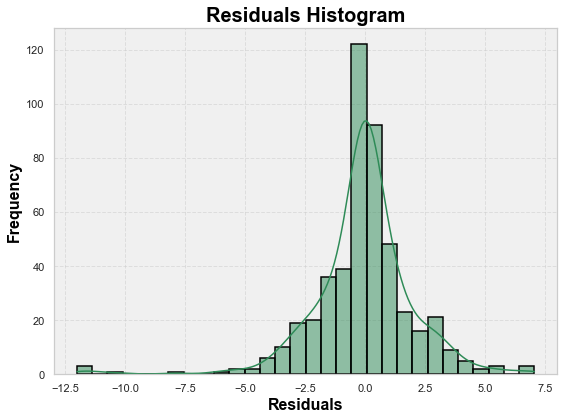

Evaluating combination: ['Open', 'Low', 'Adj Close', 'Volume']


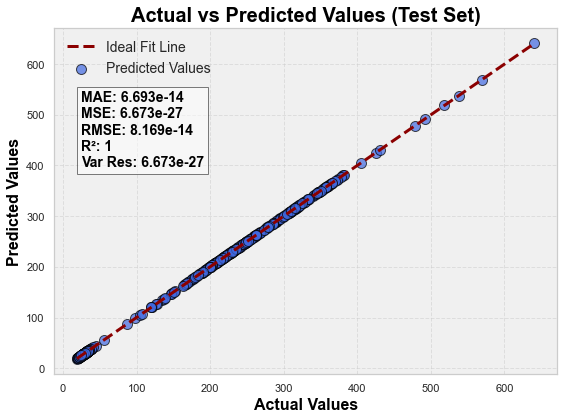

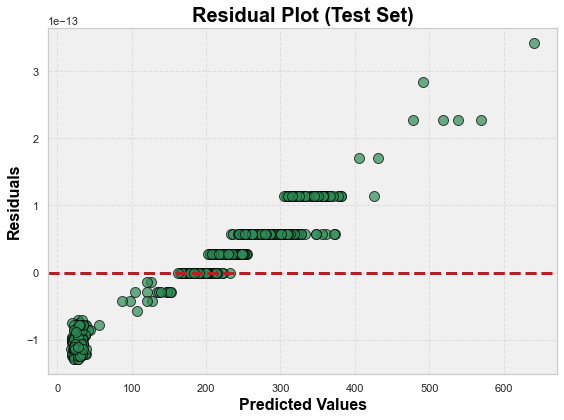

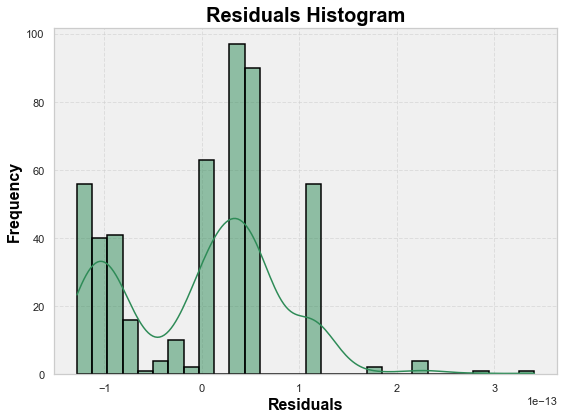

Evaluating combination: ['Open', 'High', 'Adj Close', 'Volume']


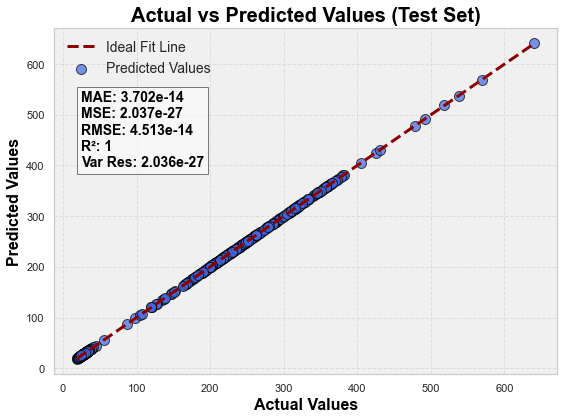

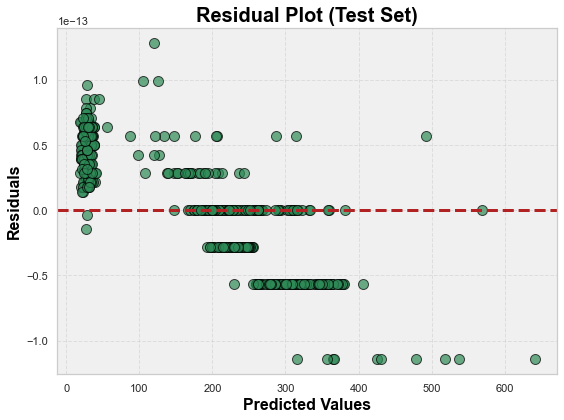

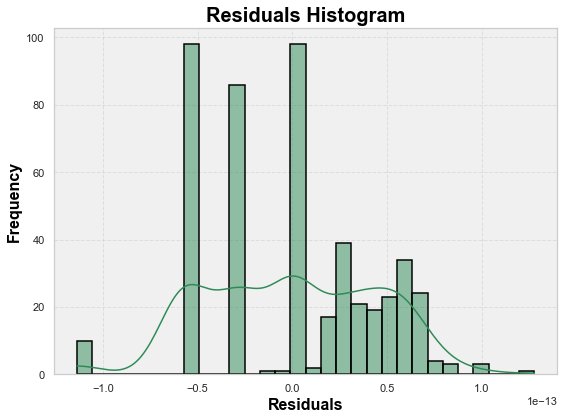

Evaluating combination: ['Low', 'High', 'Adj Close', 'Volume']


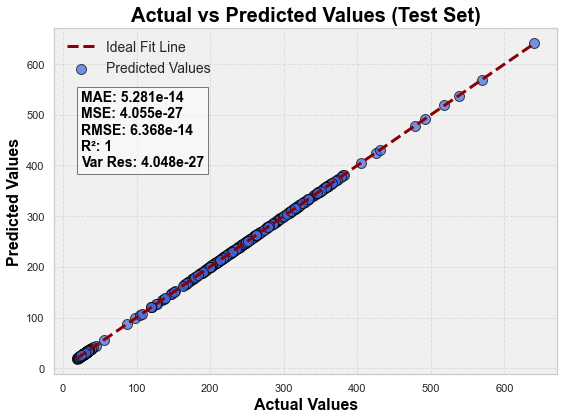

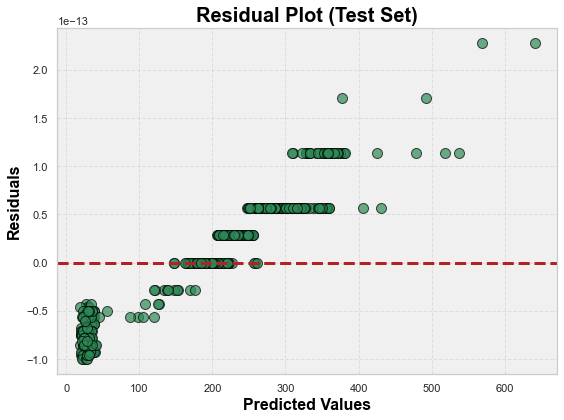

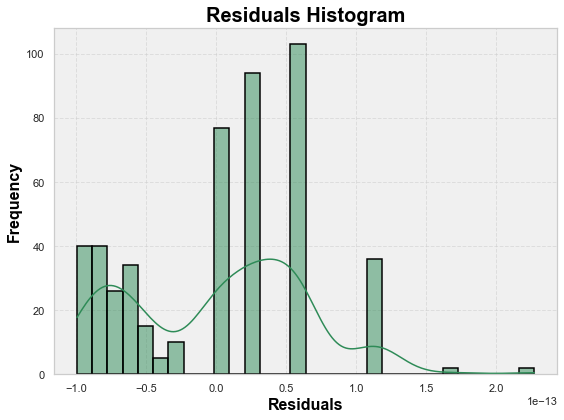

Evaluating combination: ['Open', 'Low', 'High', 'Adj Close', 'Volume']


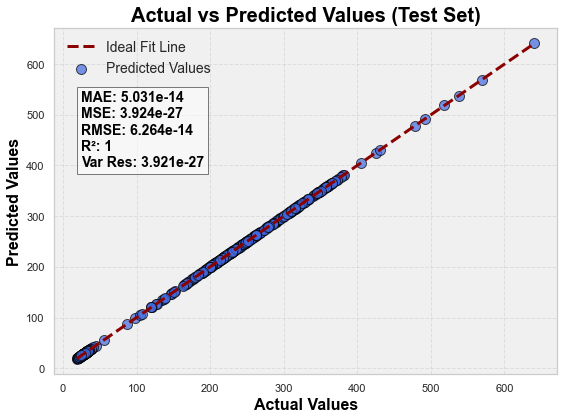

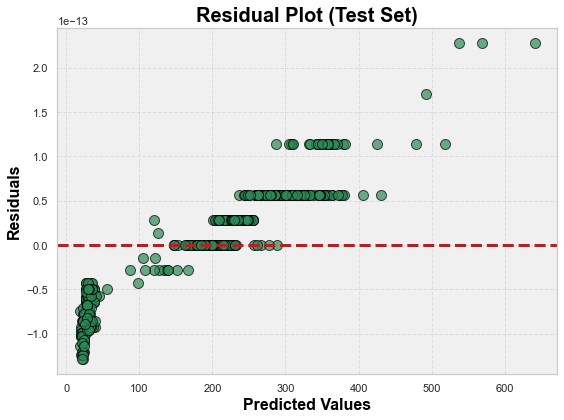

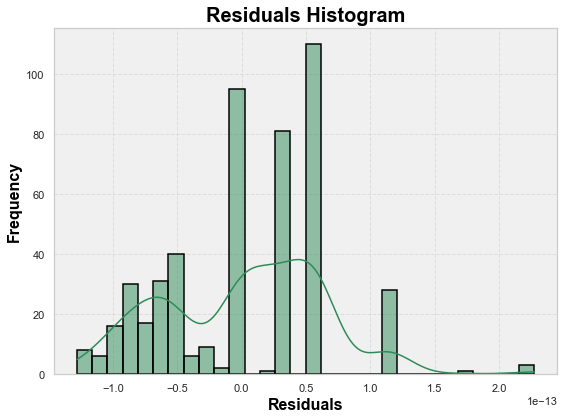

In [4]:


# Define your features
features = ['Open', 'Low', 'High', 'Adj Close','Volume']

# Initialize a dictionary to store the results
results_dict = {}

# Loop over different lengths of feature combinations
for r in range(2, len(features) + 1):  # r=1, 2, 3 (for 1, 2, and 3 feature combinations)
    combinations = list(itertools.combinations(features, r))
    
    for combo in combinations:
        df_combo = df[list(combo)]
        print(f"Evaluating combination: {df_combo.columns.tolist()}")
        
        # Scaling the data
        scaler_all = StandardScaler()
        X_scaled = scaler_all.fit_transform(df_combo)
        y = df['Close'].values
        
        # Evaluating the model and plotting the results
        results_full, y_test, y_test_pred = evaluate_linear_regression(X_scaled, y)
        plot_regression_results(y_test, y_test_pred)
        
        # Storing the results
        results_dict[tuple(combo)] = results_full

# After running, results_dict will contain the evaluation metrics for all combinations


### Compare with PCA Approach
- Define features: `Open`, `Low`, `High`, `Volume`.
- Scale features and apply PCA.
- Determine number of components for 95% variance.
- Evaluate model with PCA components.
- Plot regression results.

**Results:**
PCA approach shows lower errors, but the residual plots do not improve compared to previous models.


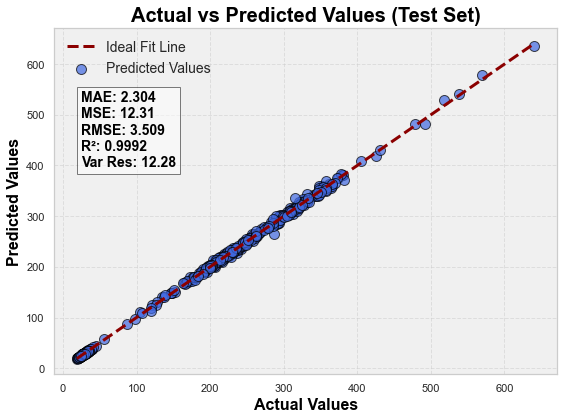

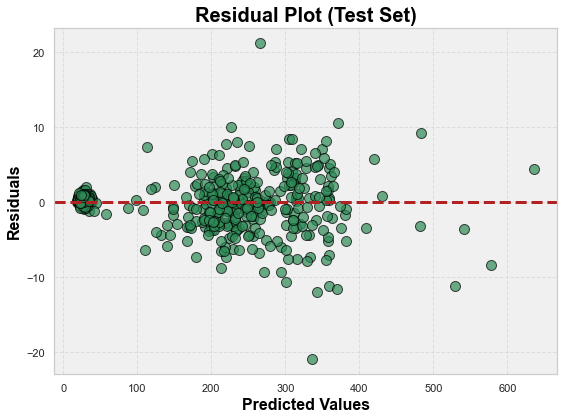

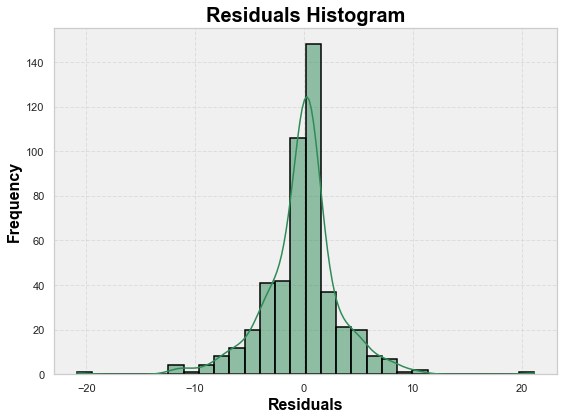

In [5]:

# Define your features
features = ['Open', 'Low', 'High',  'Volume']

# Prepare the data
X = df[features]
y = df['Close'].values

# Scale the features
scaler_all = StandardScaler()
X_scaled = scaler_all.fit_transform(X)

# Apply PCA
pca = PCA()  # Initialize PCA
X_pca = pca.fit_transform(X_scaled)  # Transform the scaled features

# Determine the amount of variance each component explains
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Choose the number of components to retain (e.g., 95% variance)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
# Evaluating the model and plotting the results
results_full, y_test, y_test_pred = evaluate_linear_regression(X_pca, y)
plot_regression_results(y_test, y_test_pred)

### Error Summary
- `Volume` was the only non-collinear feature but did not improve model errors.
- Using more than two features does not enhance the model.
- Consider exploring other models for better data fit.


Model Evaluation Results for Each Feature Combination:

Features                                 MAE        MSE        RMSE       R²        
Open, Low                                2.1291     11.0034    3.3171     0.9993    
Open, High                               2.0321     10.7007    3.2712     0.9993    
Open, Adj Close                          0.0000     0.0000     0.0000     1.0000    
Open, Volume                             3.4062     26.7084    5.1680     0.9982    
Low, High                                1.8657     8.2284     2.8685     0.9995    
Low, Adj Close                           0.0000     0.0000     0.0000     1.0000    
Low, Volume                              2.0871     9.5080     3.0835     0.9994    
High, Adj Close                          0.0000     0.0000     0.0000     1.0000    
High, Volume                             1.9677     9.9191     3.1495     0.9993    
Adj Close, Volume                        0.0000     0.0000     0.0000     1.0000    
Open, Low

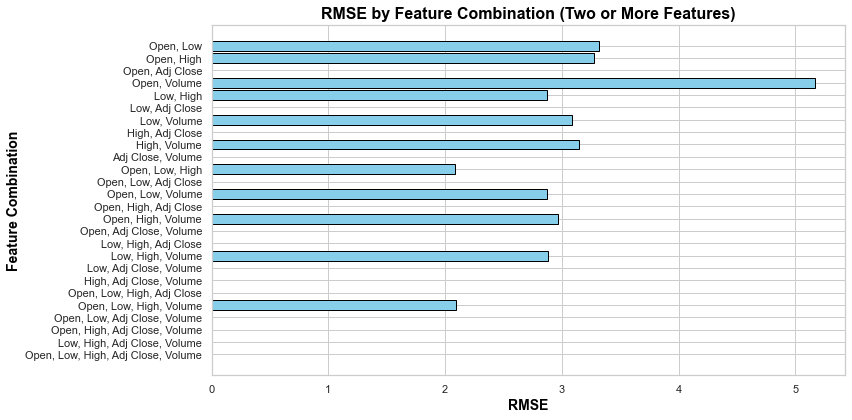

In [6]:
# Print the results in a well-formatted way
print("Model Evaluation Results for Each Feature Combination:\n")
print(f"{'Features':<40} {'MAE':<10} {'MSE':<10} {'RMSE':<10} {'R²':<10}")

for combo, metrics in results_dict.items():
    features_str = ', '.join(combo)
    mae = metrics['mae_test']
    mse = metrics['mse_test']
    rmse = metrics['rmse_test']
    r2 = metrics['r2_test']
    
    print(f"{features_str:<40} {mae:<10.4f} {mse:<10.4f} {rmse:<10.4f} {r2:<10.4f}")
# Extracting the feature combinations and their corresponding RMSE values
combinations = []
rmse_values = []

for combo, metrics in results_dict.items():
    if len(combo) > 1:  # Only consider combinations with two or more features
        features_str = ', '.join(combo)  # Convert the tuple of features to a string
        combinations.append(features_str)
        rmse_values.append(metrics['rmse_test'])  # Extract the RMSE value

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(combinations, rmse_values, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.xlabel('RMSE', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Feature Combination', fontsize=14, fontweight='bold', color='black')
plt.title('RMSE by Feature Combination (Two or More Features)', fontsize=16, fontweight='bold', color='black')
plt.gca().invert_yaxis()  # Invert y-axis to have the best (lowest RMSE) at the top

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()